# Numerical exercise
Kristine Schüller and Sigrid Aunsmo

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt 

#defining the constants that will remain the same for all problems 
h_bar=1
m=1
k_0=20
L=20

#plotting parameters 
fontsize=15
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize, 
             'figure.titlesize':fontsize,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (20, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}

plt.rcParams.update(newparams)

### Problem 1

To be able to study the propagation of a wave packet we first need to find the inital wave function. This is done by using Eq 8 from the exercise sheet: 

$\Psi(x,t) = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } e^{i(k_0x-\omega t)},$

where $C$ is just a normalization constant.


In the numerical propagation of the wave packet we want to split $\Psi$ into a real and an imaginary part.  

$
\Psi_I = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } \sin(k_0 x-\omega t)
$

$
\Psi_R = C e^{ \frac{(x-x_s)^2}{2 \sigma_x^2} } \cos(k_0 x-\omega t)
$

To normalize $\Psi$ we use that $\int |\Psi|^2 dx= \int \Big (\Psi_I^2+\Psi_R^2 \Big ) dx$, and want to find $C$ such that

$
\int_0^L | \Psi(x,t) |^2 dx = 1.
$

Numerically this corresponds to 

$$
\sum_{n=0}^{Nx-1} |\Psi(x_n,t)|^2 \Delta x = 1,
$$

where $x_n =\Delta x \cdot n$.

Let us denote the unormalized function $\Psi'(x,t) = \Psi(x,t)/C$. Then we get 

$$
\sum_{n=0}^{Nx-1} C^2 |\Psi'(x_n,t)|^2 \Delta x = \Delta x C^2 \sum_{n=0}^{Nx-1} \Big [ \Psi_I'(x_n,t)^2 + \Psi_R'(x_n,t)^2 \Big ].
$$

Now we can find the value for $C$ as 

$$
C = \sqrt{ \frac{ 1 }{ \Delta x \sum  [ \Psi_I'(x_n,t)^2 + \Psi_R'(x_n,t)^2 ]   }  }. 
$$

Then we get the normalized functions 
$\Psi_I(x,t) = C \Psi_I'(x,t)$ and $\Psi_R(x,t) = C \Psi_R'(x,t)$


In the propagation we find $\Psi_R(x,(n+1/2)\Delta t)$ and $\Psi_I(x,n \Delta t)$ at the n-th timestep. Because of this we want our inital functions to be $\Psi_I(x,0)$ and $\Psi_R(x, \frac{ \Delta t}{2} )$. 

The energy of a free particle is $E=\frac{\hbar^2 k_0^2}{2 m}=\hbar \omega$. From this formula it follows that $\omega=\frac{E}{\hbar}$.

We want the fraction by which $\Psi$ changes during an interval $\Delta t$ to be much smaller than 1. That means we have to choose $\Delta x$ and $\Delta t$ such that $\Delta t \ll  \frac{\hbar}{\frac{\hbar}{2m}\frac{1}{(\Delta x)^2}+V_{max}}\approx 0.0008$. We chose to set $\Delta t=0.00001$. The choice of $\Delta t$ is further discussed in problem 2. 



In [2]:
"""Definition of functions"""

#Function to calculate imaginary part of psi
def find_psi_im(x,t,sigma_x):
    psi_i=np.zeros(len(x))
    #using the formula, but keeping the ends equal to zero:
    psi_i[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.sin(k_0*x[1:-1]-omega*t)
    return psi_i

#Function to calculate real part of psi 
def find_psi_re(x,t,sigma_x):
    psi_r=np.zeros(len(x))
    #using the formula, but keeping the ends equal to zero:
    psi_r[1:-1] = np.exp(-(x[1:-1]-xs)**2/(2*sigma_x**2))*np.cos(k_0*x[1:-1]-omega*t)
    return psi_r

def normalize_psi(psi_i,psi_r,delta_x):
    C= np.sqrt(1/delta_x/(np.sum(psi_i**2)+np.sum(psi_r**2)))
    return psi_i*C, psi_r*C

def initvalues(x,sigma_x,delta_x,delta_t):  #finding psi_I(x,t=0) and psi_R(x, t=delta_t/2)
    psi_i=find_psi_im(x,0,sigma_x)
    psi_r=find_psi_re(x,delta_t/2,sigma_x)
    return normalize_psi(psi_i,psi_r,delta_x)


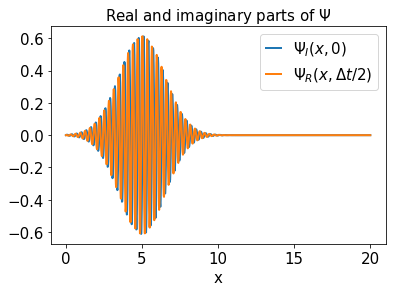

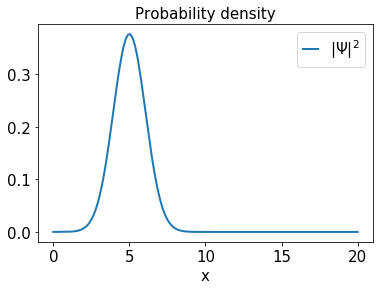

Energy:  200.0
If 1, psi is normalized:  1.0


In [3]:
#Defining constants: 
sigma_x=1.5 
xs=5 #makes the wave packet centered around x=5
Nx= 1000 #makes a smooth graph
delta_t=0.00001

delta_x= L/(Nx-1) 

#making a array of x-values from 0 to L
x=np.linspace(0,L,Nx)

#Calculating E and omega from the given formulas
E=(h_bar*k_0)**2/(2*m)
omega=E/h_bar

#making arrays of initial values of psi_r(x,delta_t/2) and psi_i(x,0)
psi_i,psi_r = initvalues(x,sigma_x,delta_x,delta_t)

#plotting
plt.title('Real and imaginary parts of $\Psi$')
plt.plot(x,psi_i,label=r'$\Psi_I(x,0)$')
plt.plot(x,psi_r,label=r'$\Psi_R(x,\Delta t /2)$')
plt.legend()
plt.xlabel('x')
plt.show()

#finding and plotting the probability
plt.title("Probability density")
psi_squared=psi_i**2+psi_r**2 
plt.plot(x,psi_squared,label=r'$|\Psi|^2$')
plt.xlabel('x')
plt.legend()
plt.show()

#printing the energy
print("Energy: ", E)
#Checking the normalization
print("If 1, psi is normalized: ",np.sum(psi_squared)*delta_x)


The number of x-values, Nx, was set to 1000. This value gives a smooth plot for $\Psi_I$ and $\Psi_R$, as well as for the probability density. The time difference between the plots of $\Psi_I$ and $\Psi_R$ is so small that it is practically insignificant. The values of $x_s$ and sigma_x were chosen so that the plot looks similar to figure 1 in the exercise sheet. The wave packet has a gaussian shape located around $x_s$, which value was set equal to 5. The value of $\sigma_x$ determines the spread of the plot, and was set equal to 1.5.

The first plot shows the real and imaginary parts of $\Psi$. The second plot shows the probability density for finding the particle represented by the wave packet. 

### Problem 2
Now we want to study the propagation of the wave packet. 

From the Schödringer equation it can be derived a numerical propagation method. 

$
\Psi_I(x,t+\Delta t)= \Psi_I(x,t)-\Delta t \Big [ V(x)\Psi_R(x,t) -\frac{\hbar^2}{2m} \frac{\Psi_R(x,t-\frac{\Delta t)}{2}-2\Psi_R(x,t)+\Psi_R(x,t+\frac{\Delta t}{2})}{(\Delta x)^2}   \Big ]
$

and 

$
\Psi_R(x,t+\Delta t/2)= \Psi_R(x,t)+\Delta t \Big [ V(x)\Psi_I(x,t) -\frac{\hbar^2}{2m} \frac{\Psi_I(x,t-\Delta t)-2\Psi_I(x,t)+\Psi_I(x,t+\Delta t)}{(\Delta x)^2}   \Big ]
$

In this problem we want the wave to propagate a distance $L/2$ which will take a time $T=\frac{L}{2v_g}$. $v_g$ is the group velocity and is given by $v_g= \frac{\partial \omega}{\partial k} \Big |_{k=k_0}$. We know that $\omega =\frac{E}{\hbar}=\frac{\hbar k^2}{2 m}$ which gives $v_g=\frac{\hbar k_0}{m}$.



In [4]:
"""Definition of the functions needed to perform the propagation"""

#functions to update psi_r and psi_i
def newPsi_im(psi_i,psi_r,delta_x,dt, V):
    nextPsi_i=np.zeros(len(psi_i))
    nextPsi_i[1:-1] = psi_i[1:-1] - dt *(V[1:-1]/h_bar*psi_r[1:-1] - h_bar/(2*m) *(psi_r[2:]-2*psi_r[1:-1]+psi_r[:-2])/delta_x**2)
    return nextPsi_i
                     
def newPsi_re(psi_i,psi_r,delta_x,dt, V):
    nextPsi_r=np.zeros(len(psi_r))
    nextPsi_r[1:-1] = psi_r[1:-1] + dt *((V[1:-1]/h_bar*psi_i[1:-1]) - h_bar/(2*m) *(psi_i[2:]-2*psi_i[1:-1]+psi_i[:-2])/delta_x**2)
    return nextPsi_r

#propagating psi_r and psi_i a given number of timesteps
def propagate_psi(psi_i,psi_r,timesteps,V,delta_x,dt):
    for i in range(timesteps):
        psi_i=newPsi_im(psi_i,psi_r,delta_x,dt, V)
        psi_r=newPsi_re(psi_i,psi_r,delta_x,dt, V)
    return psi_i, psi_r

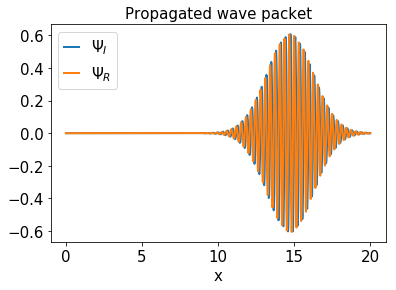

In [5]:
#Defining constants
v_g=(h_bar*k_0)/m
T= L/(2*v_g) #time of propagation 
timesteps=int(T/delta_t) #number of steps in the iteration 

#Defining the potential which is zero everywhere
V2=np.zeros(len(x)) 

#Calculating the inital values for psi_i and psi_r
psi_i,psi_r = initvalues(x,sigma_x,delta_x,delta_t)

#Propagating
psi_i, psi_r = propagate_psi(psi_i,psi_r,timesteps,V2,delta_x,delta_t)

#plotting 
plt.title("Propagated wave packet")
plt.plot(x,psi_i,label="$\Psi_I$")
plt.plot(x,psi_r, label="$\Psi_R$")
plt.xlabel('x')
plt.legend()
plt.show()



The plots below show the wave packet at its initial position $x=5$, as well as after propagation to the position $x=15$, for the three values of $\sigma_x$ given in the exercise text. The plots show how a larger $\sigma_x$ gives a wider initial wave packet. A narrower initial wave packet leads to a greater increase of deviation for the propagated wave packet. This is best illustrated by the plot for $\sigma_x=0.5$. 

The last two plots shows the probability densities for the inital and propagated wave packets for $\sigma_x=0.5$ and $\sigma_x=1$. These plots illustrate the same effects of the value of $\sigma_x$ as described above. 

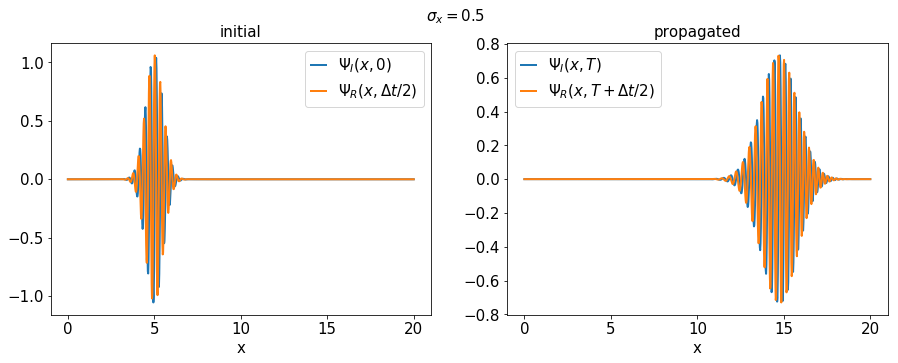

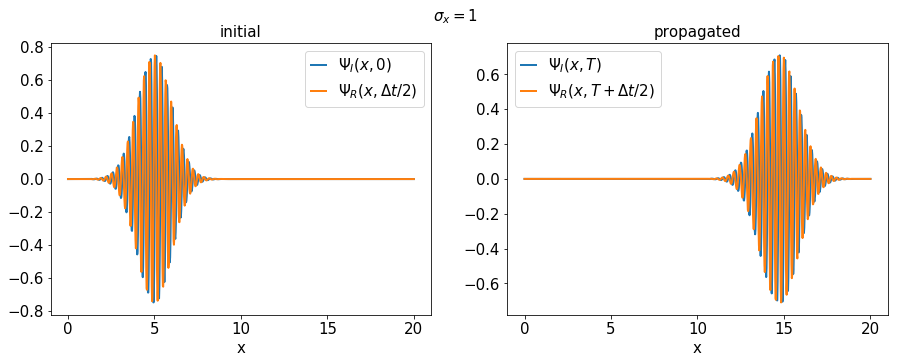

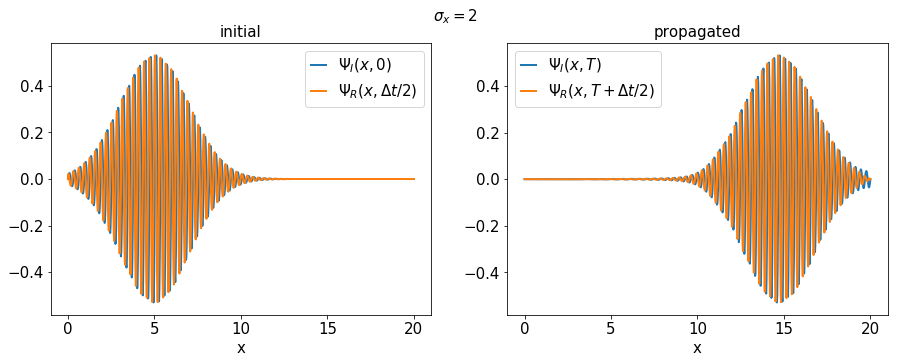

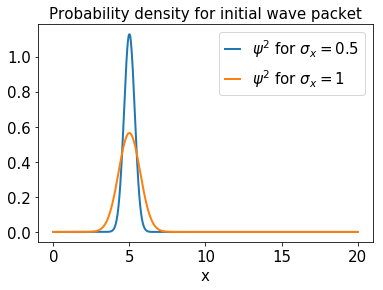

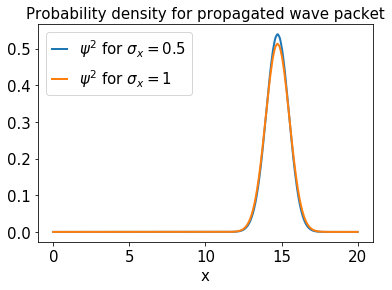

In [6]:
"""plotting for different values of sigma_x"""

sigma_xs=[0.5,1,2] #list of values of sigma_x
psi_squared_list=[] #empty list to save values of psi_squared
psi_prop_squared_list=[]

for i in range(len(sigma_xs)):
    sigmax=sigma_xs[i]
    
    #finding initial values: 
    psi_i,psi_r=initvalues(x,sigmax,delta_x,delta_t)

    #propagating
    psi_i_prop,psi_r_prop = propagate_psi(psi_i,psi_r,timesteps,V2,delta_x,delta_t)
    
    #calculating the probability density and adding to a list such that it can be plotted later
    psi_squared_list.append(psi_i**2+psi_r**2)
    
    psi_prop_squared_list.append(psi_i_prop**2+psi_r_prop**2)
    
    #plotting (two subplots)
    f, axs = plt.subplots(2,2,figsize=(15,5))
    plt.subplot(1,2,1)
    plt.suptitle(r'$\sigma_x=$'+str(sigmax)) #title for both subplots
    plt.title("initial") 
    plt.xlabel('x')
    plt.plot(x,psi_i,label=r'$\Psi_I(x,0)$')
    plt.plot(x,psi_r,label=r'$\Psi_R(x,\Delta t/2)$')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("propagated")
    plt.xlabel('x')
    plt.plot(x,psi_i_prop,label=r'$\Psi_I(x,T)$')
    plt.plot(x,psi_r_prop,label=r'$\Psi_R(x,T +\Delta t/2)$')
    plt.legend()
    plt.show()
    
#plotting the probability density psi_squared
plt.title("Probability density for initial wave packet")
plt.plot(x,psi_squared_list[0], label=r'$\psi^2$ for $\sigma_x=0.5$')
plt.plot(x,psi_squared_list[1], label=r'$\psi^2$ for $\sigma_x=1$')
plt.legend()
plt.xlabel('x')
plt.show()

plt.title("Probability density for propagated wave packet")
plt.plot(x,psi_prop_squared_list[0], label=r'$\psi^2$ for $\sigma_x=0.5$')
plt.plot(x,psi_prop_squared_list[1], label=r'$\psi^2$ for $\sigma_x=1$')
plt.legend()
plt.xlabel('x')
plt.show()



As mentioned we want $\Delta t \ll  \frac{\hbar}{\frac{\hbar}{2m}\frac{1}{(\Delta x)^2}+V_{max}}\approx 0.0008$ to get a stable numerical propagation. 

The plots below show that the numerical computation is stable for $\Delta_t$ smaller than 0.0004. For $\Delta_t$ larger than this value the wave function diverges. In the next problems we are also introducing a potential barrier so we don't want $\Delta t$ to be too close to a value which makes the propagation diverge. Based on that we chose $\Delta t$ to be $10^{-5}$ in the following problems.  

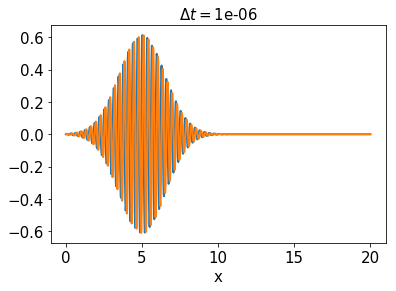

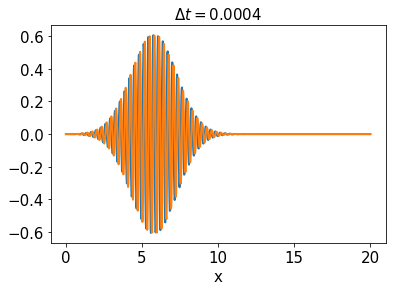

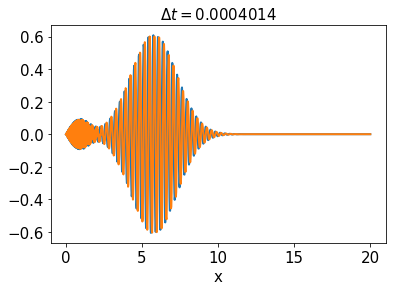

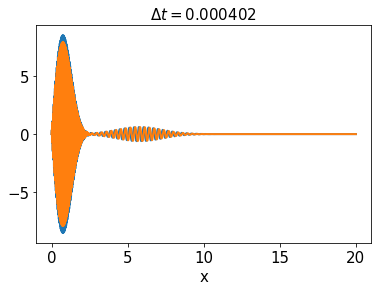

In [7]:
"""Stability test of delta_t"""

#number of timesteps to use in this test
timesteps_deltaT_test=100

#Making list of values for delta_t 
list_of_delta_ts=[1e-6,0.0004,0.0004014,0.000402]

for i in range(len(list_of_delta_ts)):
    deltat=list_of_delta_ts[i] 
     
    #Initial values
    psi_i,psi_r= initvalues(x,sigma_x,delta_x,deltat)

    #propagation
    psi_i,psi_r = propagate_psi(psi_i,psi_r,timesteps_deltaT_test,V2,delta_x,deltat)
    
    #plotting
    plt.title("$\Delta t=$"+str(deltat))
    plt.xlabel('x')
    plt.plot(x,psi_r)
    plt.plot(x,psi_i)
    plt.show()

### Problem 3

In the following problems we introduce a potential barrier and study how this affect the propagation of the wave packet. 

In [8]:
"""Defining functions"""

#Creating an array for a potential with a potential barrier of value V0
def potential_barrier(V0,l,x):
    return V0*np.heaviside(x-L/2+l/2,0)*np.heaviside(L/2+l/2-x,0)

#Function to caclulate transmission probability
#transmission probability = the integrated probability density from x= 10 to x= 20
#reflection probability = the integrated probability density from x= 0 to x= 10 
def find_trans_refl_prob(psi_i,psi_r,Nx,delta_x): 
    psi_absqrd=psi_i**2+psi_r**2
    num_of_points_before_barrier=int(Nx/2)
    Pt=np.sum(psi_absqrd[num_of_points_before_barrier:]*delta_x) #probability of transmisson
    Pr=np.sum(psi_absqrd[:num_of_points_before_barrier]*delta_x) #probability of reflection 
    return Pt,Pr


The first plot below shows how the wave packet has been partially transmitted and partially reflected by the barrier with height $V_0 = E /2$ and width $l=L/50$. A plot of the potential is included for visualisation, and the value of the potential has been scaled to fit the plot of the wave packet. The y-axis shows the scale of the normalized wave packed and not the scale of the potential. 

The second plot shows the probability density of the propagated wave packet. The calculated probabilities of transmission and reflection are stated below the plots. The total probability is very close to 1, which is a good indication that the calculations are correct. 

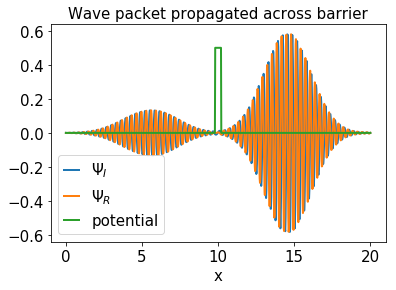

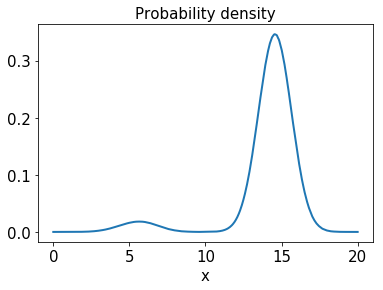

Transmission probability:  0.94321671352172 
Reflection probability:  0.05678326219924168
Total probability:  0.9999999757209617


In [9]:
#Defining the values specific for this problem 
l=L/50
V0_3=E/2

#defing the potensial as an array
V3=potential_barrier(V0_3,l,x)

#initial values for psi_i and psi_r: 
psi_i0,psi_r0=initvalues(x,sigma_x,delta_x,delta_t)

#propagating:
psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V3,delta_x,delta_t)

#plotting the propagated wave packet
plt.title("Wave packet propagated across barrier")
plt.xlabel('x')
plt.plot(x,psi_i,label=r'$\Psi_I$')
plt.plot(x,psi_r,label=r'$\Psi_R$')
plt.plot(x,V3/(2*V0_3),label="potential") #Potential scaled to fit the graph
plt.legend()
plt.show()

#Plotting the probability density
plt.title("Probability density")
plt.xlabel('x')
psi_absqrd=psi_i**2+psi_r**2
plt.plot(x,psi_absqrd)
plt.show()

#caclulating the transmission and reflection probability
Pt,Pr=find_trans_refl_prob(psi_i,psi_r,Nx,delta_x)  #Probability for transmission
print("Transmission probability: ",Pt, "\nReflection probability: ",Pr)
print("Total probability: ",Pt+Pr) #Should be equal to 1


### Problem 4

In this problem the transmission and reflection probabilities are calculated by the same function as in problem 3, for 50 different barrier heights between $0$ and $\frac{3}{2}E$. The plots below show the quantum probabilites of transmission and reflection compared with the classical probabilites as functions of barrier height. Classically, if $E$ is smaller than the barrier height, there is a $100%$ probability of reflection, and $0%$ probability of transmission. In quantum mechanics however, there is still some probability of transmission even though the energy is smaller than the barrier height, as illustrated by the plots below. 


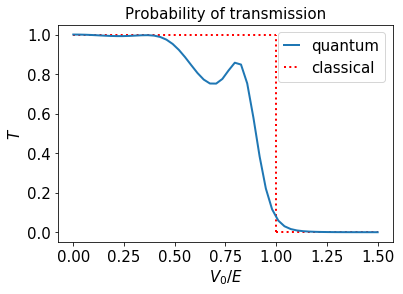

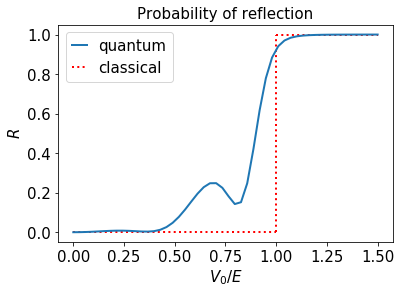

In [10]:

V0_list=np.linspace(0,(3*E)/2,50)#List of 50 different values of V0
PtV0  = np.zeros(len(V0_list))  #list to fill in transmission probabilities 
PrV0  = np.zeros(len(V0_list))  #list to fill in reflection probabilities 

for i in range(len(V0_list)):
    V4=potential_barrier(V0_list[i],l,x)
       
    #initial values
    psi_i0,psi_r0=initvalues(x,sigma_x,delta_x,delta_t)
    
    psi_i, psi_r = propagate_psi(psi_i0,psi_r0,timesteps,V4,delta_x,delta_t)
    
    PtV0[i], PrV0[i] =find_trans_refl_prob(psi_i,psi_r,Nx,delta_x)

#plotting transmission probability as a function of potenial barrier height
plt.title('Probability of transmission')
#quantum
plt.plot(V0_list/E, PtV0,label='quantum')
#classical
plt.hlines(1,0,1,linestyles="dotted",color="red",label='classical')
plt.vlines(1,0,1,linestyles="dotted",color="red")
plt.hlines(0,1,1.5,linestyles="dotted",color="red")

plt.legend()
plt.xlabel(r'$V_0/E$')
plt.ylabel('$T$')
plt.show()

#plotting reflection probability as a function of potenial barrier height
plt.title('Probability of reflection')
#quantum
plt.plot(V0_list/E, PrV0,label='quantum')
#Classical 
plt.hlines(0,0,1,linestyles="dotted",color="red",label='classical')
plt.vlines(1,0,1,linestyles="dotted",color="red")
plt.hlines(1,1,1.5,linestyles="dotted",color="red")

plt.legend()
plt.ylabel('$R$')
plt.xlabel(r'$V_0/E$')
plt.show()


### Problem 5
The plot below shows the probabilities of reflection and transmission as a function of barrier widths between $0$ and $\frac{L}{20}$. The barrier height was set to $\frac{9}{10}E$. Nx was set to 1950 to get a high enough resolution of the potential barrier width. With this value for Nx, the potential barrier width increases by two points for every increasement of $l$.


Since the value of the potential barrier is lower than the energy of the wave packet, the kinetic energy will be positive both outside and inside the barrier. The wave function is a sine wave inside the barrier, but it is wrapped in a gaussian curve and has a longer wave length than it has outside of the barrier. Because of the sine shape of the wave function, the transmission and reflection probabilities oscillate around 0.5. 

In [ ]:
#Defining constants that are specific for this problem. 
Nx5=1950 #Gives a stable increasment of number of points for each encreasment of l 
delta_x5= L/(Nx5) 
x5=np.linspace(0,L,Nx5) 
V05 = 9/10*E #potential barrier height for problem 5 

#Making a list of 50 different values of l from l=0 to l=L/20
L_list=np.linspace(0,L/20,50)
PtL=np.zeros(len(L_list)) #list to fill in transmission probabilities as a function of l
PrL=np.zeros(len(L_list)) #list to fill in reflection probabilities as a function of l 

#Find transmission probability for all l in L_list 
for i in range(len(L_list)):
    psi_i5,psi_r5=initvalues(x5,sigma_x,delta_x5,delta_t)
    
    V5= potential_barrier(V05,L_list[i],x5)
    
    psi_i5, psi_r5 = propagate_psi(psi_i5,psi_r5,timesteps,V5,delta_x5,delta_t)
     
    PtL[i], PrL[i] = find_trans_refl_prob(psi_i5,psi_r5,Nx5,delta_x5)  
    

plt.title('Transmission and reflection probability as a function av barrier width')
plt.plot(L_list,PtL,label='$T(l)$')
plt.plot(L_list,PrL,label='$R(l)$')
plt.xlabel('$l$, potential barrier width')
plt.legend()
plt.show()